# Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
import warnings
warnings.filterwarnings("ignore")
from collections import defaultdict
from sklearn.model_selection import train_test_split as tts
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

## Load and View Dataset

In [2]:
df = pd.read_csv('insurance_claims.csv')
df_copy = df.copy()
pd.set_option('display.max_columns', 100)
df_copy.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


## View Description of Dataset

In [3]:
df_copy.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


## View dtypes of columns

In [4]:
df_copy.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

## Changing dtypes of certain columns to object (as should be categorical features)

In [5]:
num_to_cat = ['number_of_vehicles_involved', 'bodily_injuries', 'witnesses']
for column in num_to_cat:
    df_copy[column] = df_copy[column].astype('object')

## Split the dataset into features and target variable

In [6]:
#Drop columns with unique values like policy number, date, zipcode
X = df_copy.drop(['policy_number', 'policy_bind_date', 'insured_zip', 'incident_date','fraud_reported', 'incident_location'], 1)
y = df_copy['fraud_reported']

## Define function for finding missing values

In [7]:
def missing_value(dataframe, value):
    
    '''
        
    Function checks for the columns in which missing_value provided is present
    Takes dataframe to check for missing value and missing value a defined by user as input
    returns those columns as a list
        
    '''
    global cols
    cols = dataframe.isin([value]).any()[dataframe.isin([value]).any() == True].index.tolist()
    print(cols)
    
#Apply function on df_copy as ? is there in some of the columns
if __name__ == '__main__':
    value = str(input('Enter missing value: '))
    missing_value(df_copy, value)

Enter missing value: ?
['collision_type', 'property_damage', 'police_report_available']


# Steps taken to Impute missing values found using KNN Imputer

## Split features into numerical and categorical features

In [8]:
num = X.select_dtypes(include = np.number)
cat = X.select_dtypes(exclude = np.number)

## Initialiaze a label encoder and KNN imputer

In [9]:
d = defaultdict(LabelEncoder) #Saving LabelEncoder as dictionary so that can be used again totransform values to original
imputer = KNNImputer()

## Make a function to impute ? using KNNImputer

In [10]:
def impute_missing(cat_df, num_df, list_of_cols, dict_of_encoder):
    '''
            
    Function to impute the missing values using KNN Imputer
    Takes as arguments the categorical features, numerical features, columns having missing
    values and the label encoder to use
    
    '''
    
    #Apply label encoder on the columns of categorical features
    cat_df = cat_df.apply(lambda x: dict_of_encoder[x.name].fit_transform(x))
    
    #Replace the missing value encoded (?) with np.nan
    # "?" was encoded as 0 for all columns that had "?"
    for column in list_of_cols:
        cat_df[column] = cat_df[column].replace(0, np.nan)
        
    #Join the categorical and numerical features
    X = num_df.join(cat_df)
    
    #Apply KNNImputer on combined features and save it as a dataframe
    encode_data = pd.DataFrame(imputer.fit_transform(X),columns = X.columns, dtype = int)
    
    #Seperate the categorical and numerical features
    cat_df = encode_data[list(cat_df)]
    num_df = encode_data[list(num_df)]
    
    #Inverse transform the categorical features to their original values
    global new_cat
    new_cat = cat_df.apply(lambda x : dict_of_encoder [x.name].inverse_transform(x))
    print(new_cat.head())
    
#Apply impute missing function to impute '?'
impute_missing(cat, num, cols, d)

  policy_state policy_csl insured_sex insured_education_level  \
0           OH    250/500        MALE                      MD   
1           IN    250/500        MALE                      MD   
2           OH    100/300      FEMALE                     PhD   
3           IL    250/500      FEMALE                     PhD   
4           IL   500/1000        MALE               Associate   

  insured_occupation insured_hobbies insured_relationship  \
0       craft-repair        sleeping              husband   
1  machine-op-inspct         reading       other-relative   
2              sales     board-games            own-child   
3       armed-forces     board-games            unmarried   
4              sales     board-games            unmarried   

              incident_type   collision_type incident_severity  \
0  Single Vehicle Collision   Side Collision      Major Damage   
1             Vehicle Theft   Rear Collision      Minor Damage   
2   Multi-vehicle Collision   Rear Collision

# Initiate a class to make graphs and charts

In [11]:
class GraphAndCharts:
    
    #Function to create countplot of categorical features with target variable
    def countplots(self, dataframe, column, hue):
        plt.figure(figsize = (10, 10))
        sns.countplot(dataframe[column], hue = hue)
        plt.legend()
        plt.xticks(rotation = 90)
        plt.title('Distribution of Claim Frauds by {}.'.format(column))
        plt.show()
      
    #Function to create heatmap of numerical features
    def heatmaps(self, dataframe):
        plt.figure(figsize = (10, 10))
        sns.heatmap(dataframe.corr(), annot = True, cmap = 'Blues')
        plt.title('Correlation matrix for numerical features')
        plt.show()
        
    #Function to create pairplot of numerical features with target variable
    def pairplots(self, dataframe):
        plt.figure(figsize = (20, 20))
        sns.pairplot(dataframe)
        plt.title('Scatter and Density plot')
        plt.show()
        
        
    #Function to create roc_auc_curve
    def roc_auc_curve(self, estimator, x_test, y_true):
        y_proba = estimator.predict_proba(x_test)[::,1]
        fpr, tpr, _ = roc_curve(y_test,  y_proba)
        auc = round(roc_auc_score(y_test, y_proba), 3)
        plt.figure(figsize = (10, 10))
        sns.lineplot(fpr,tpr,label="data 1, auc="+str(auc))
        plt.legend(loc=4)
        plt.title("ROC AUC Curve for Fraud Detection")
        plt.show()
        
    #Function to create classification report
    def classification_graph(self, y_true, y_predict):
        clf_report = classification_report(y_true, y_predict, target_names = ['No', 'Yes'], output_dict=True)
        plt.figure(figsize = (8, 7))
        sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
        plt.title('Classification Report of Model')
        plt.show()
        
    #Function to create feature importance graph
    def feature_imp_graph(self, estimator, dataframe, feature_column, feature_imp_column):
        sns.barplot(x = dataframe[feature_column], y = dataframe[feature_imp_column])
        plt.xlabel('Features')
        plt.ylabel('Feature Importance')
        plt.title('Feature Importance as per {} Model'.format(estimator))
        plt.xticks(rotation = 90)
        plt.show()

## Initiate a GraphAndCharts object

In [12]:
gc = GraphAndCharts()

## Make countplots for categorical features

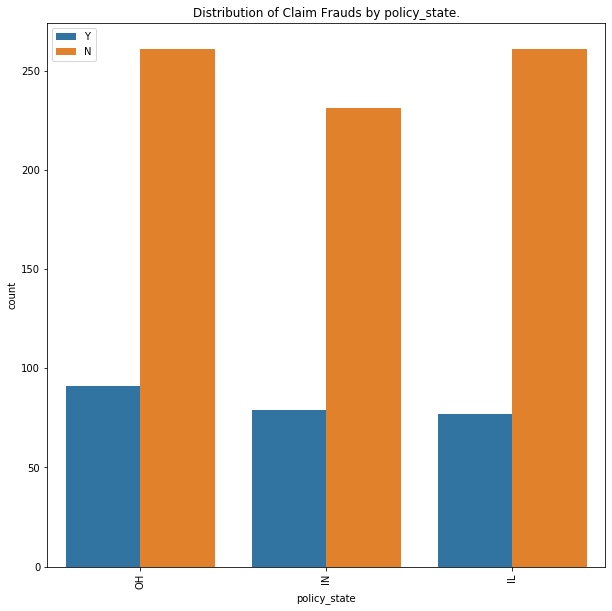

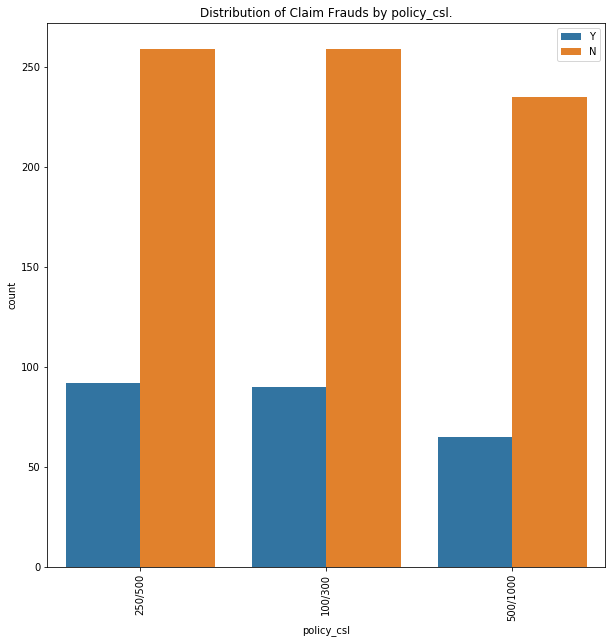

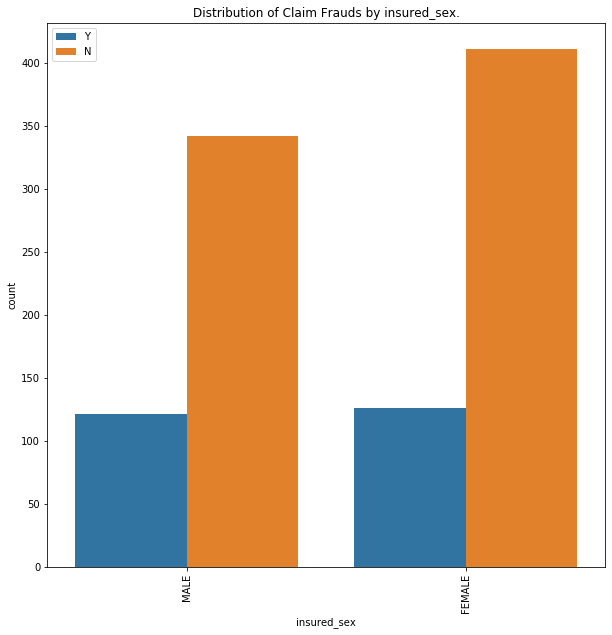

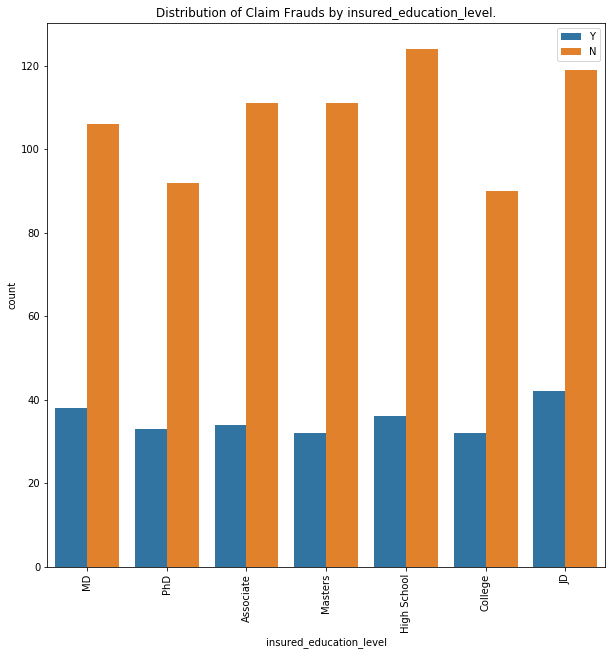

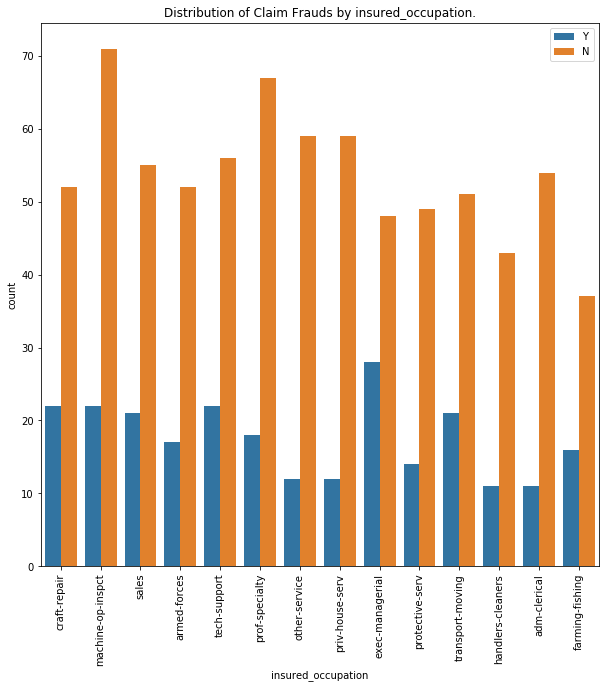

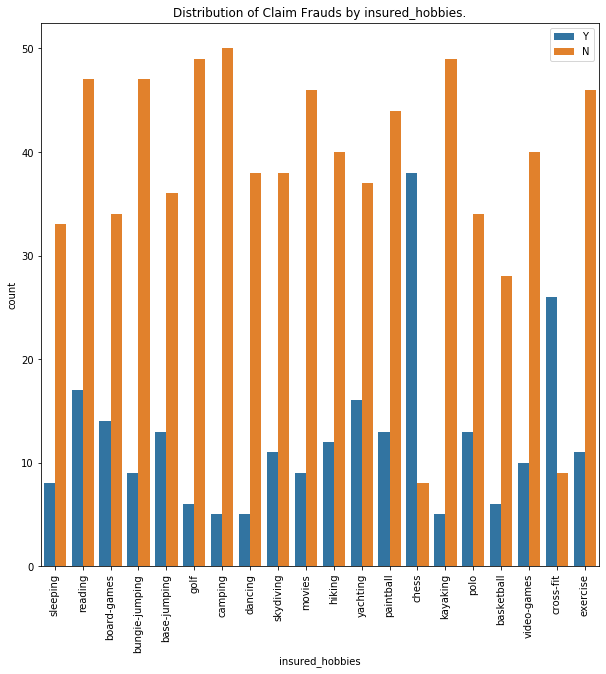

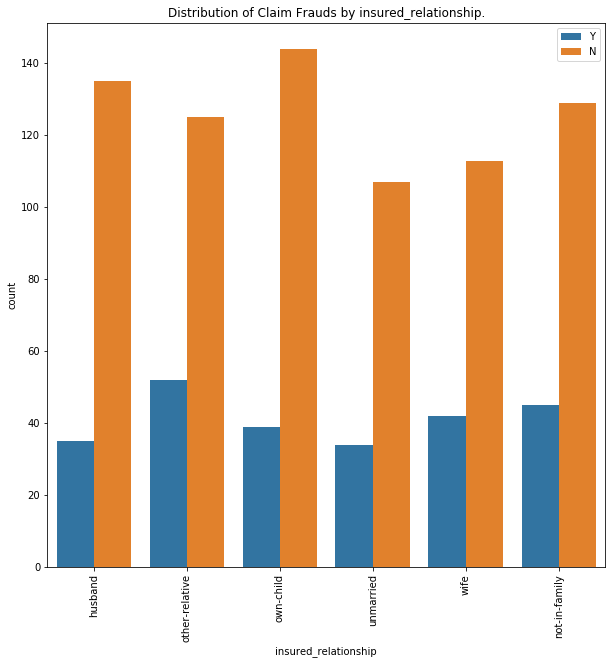

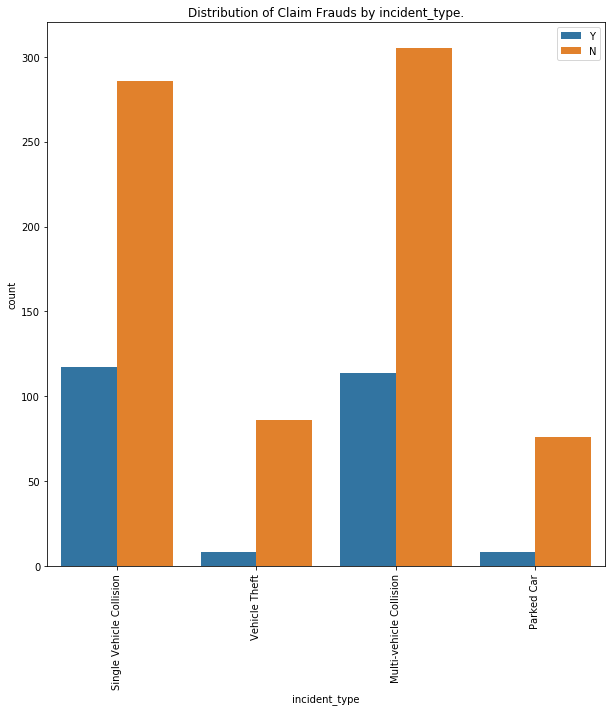

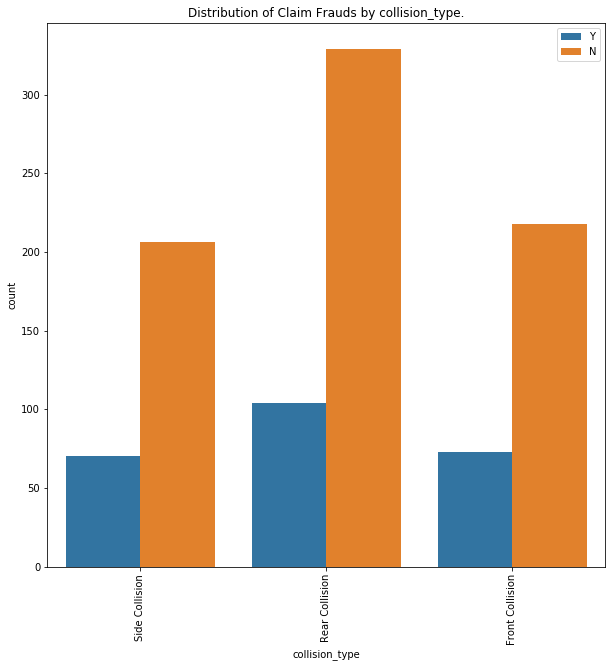

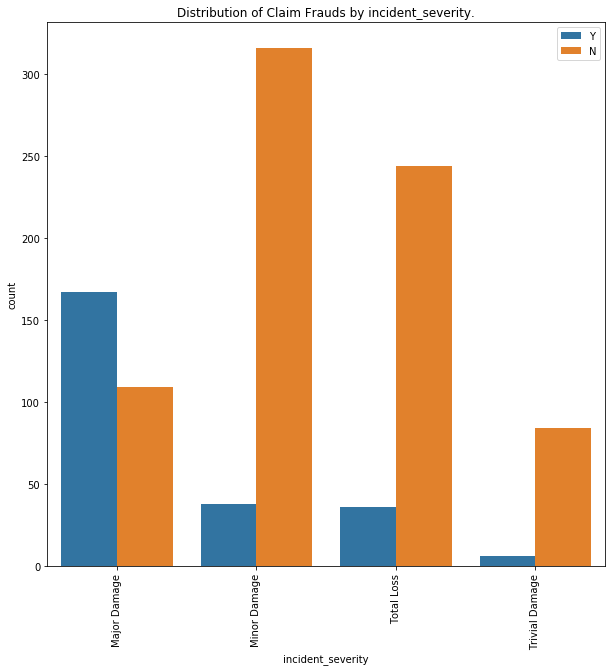

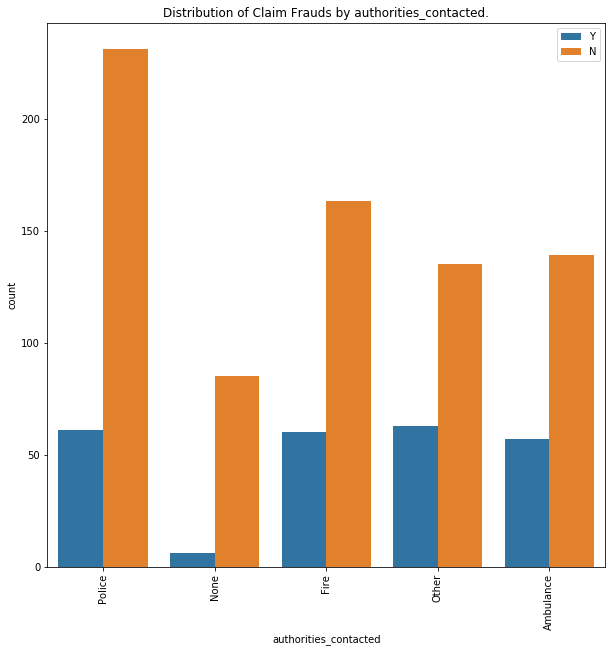

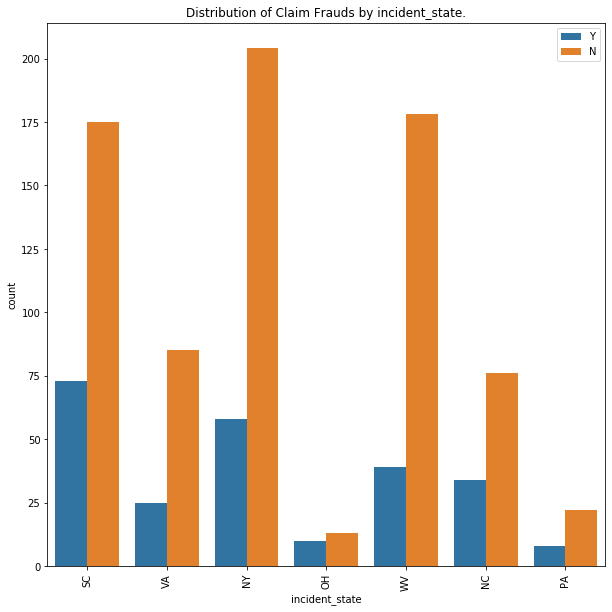

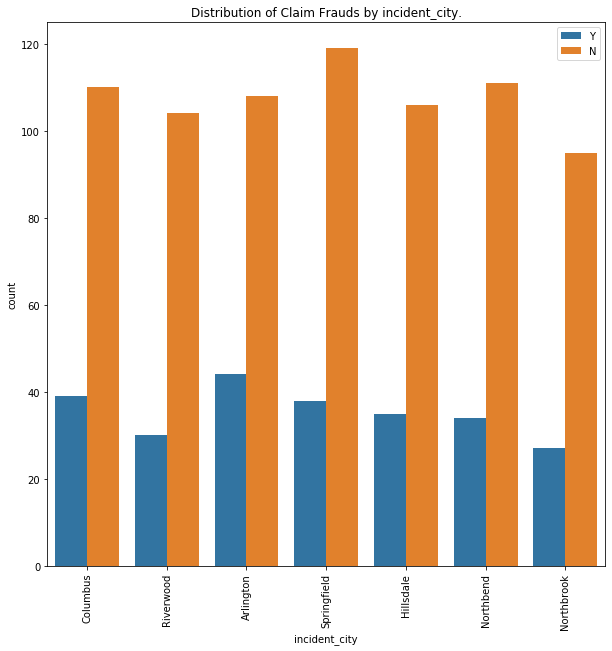

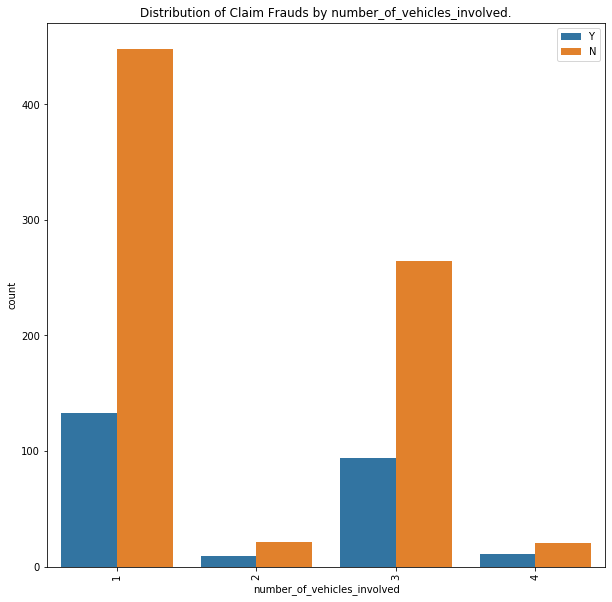

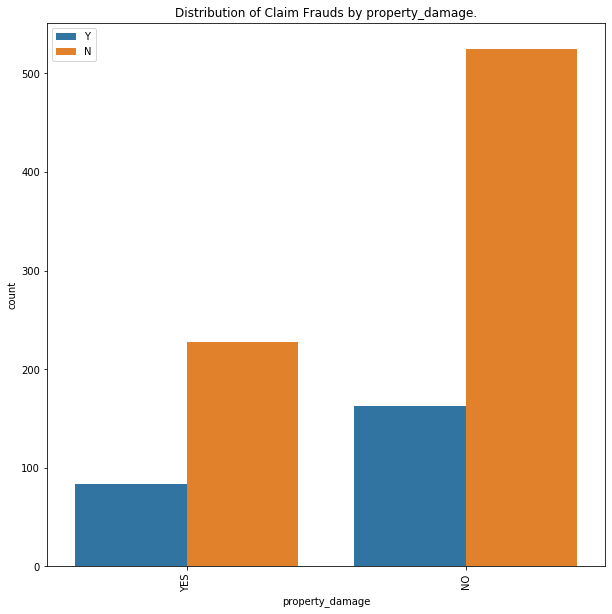

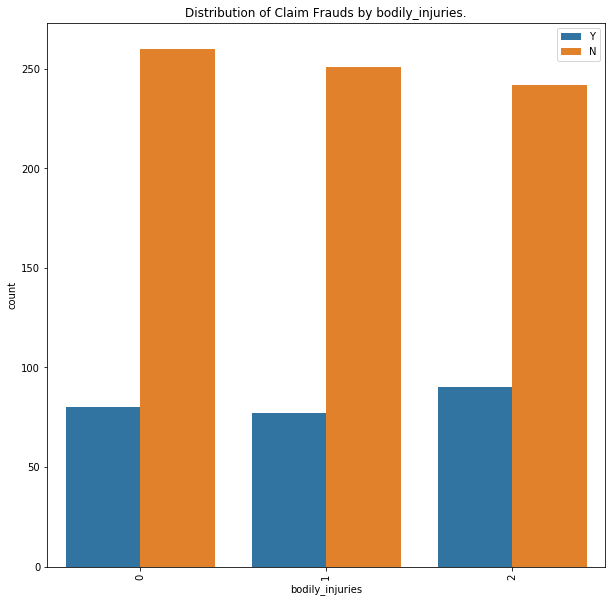

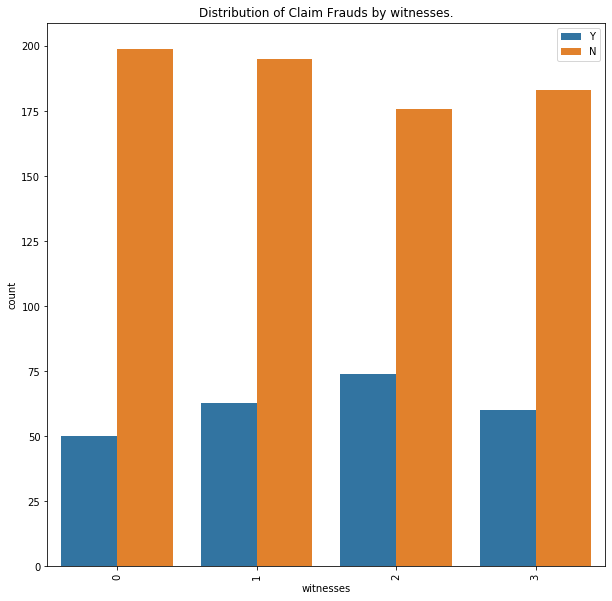

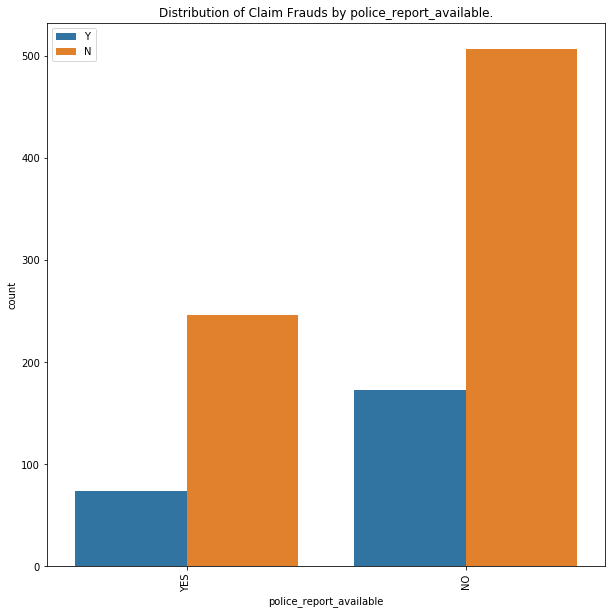

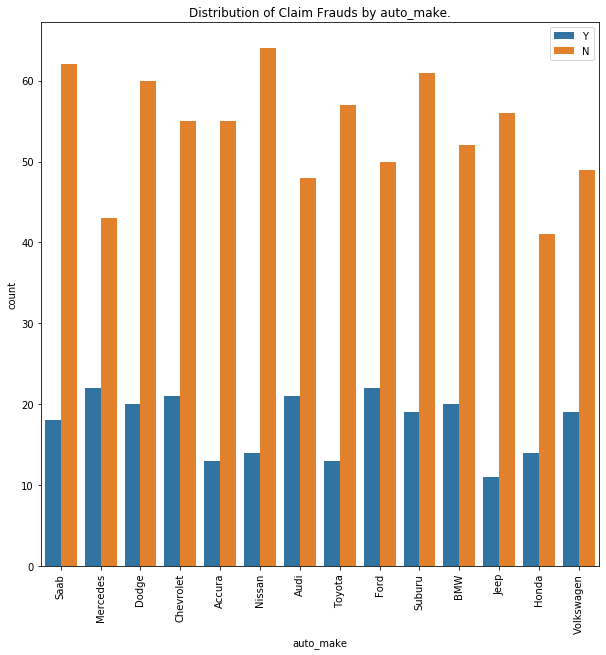

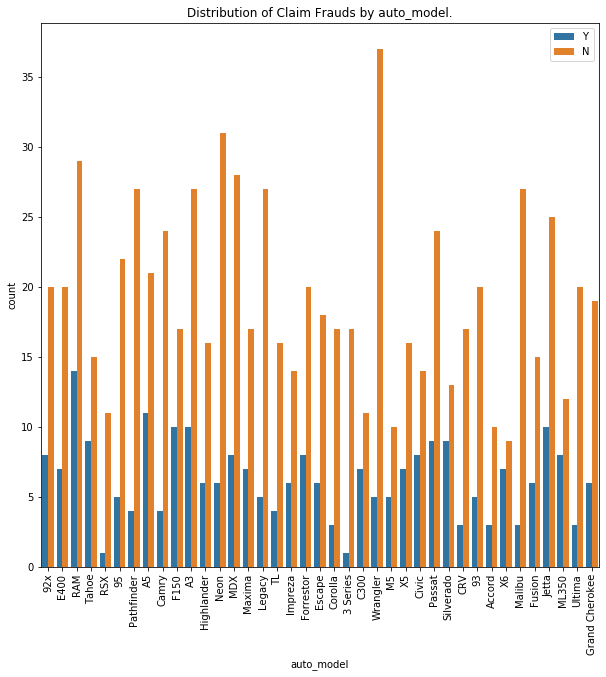

In [13]:
for column in new_cat:
    if new_cat[column].nunique() < 50:
        gc.countplots(new_cat, column, y)

## Make heatmap of numerical features

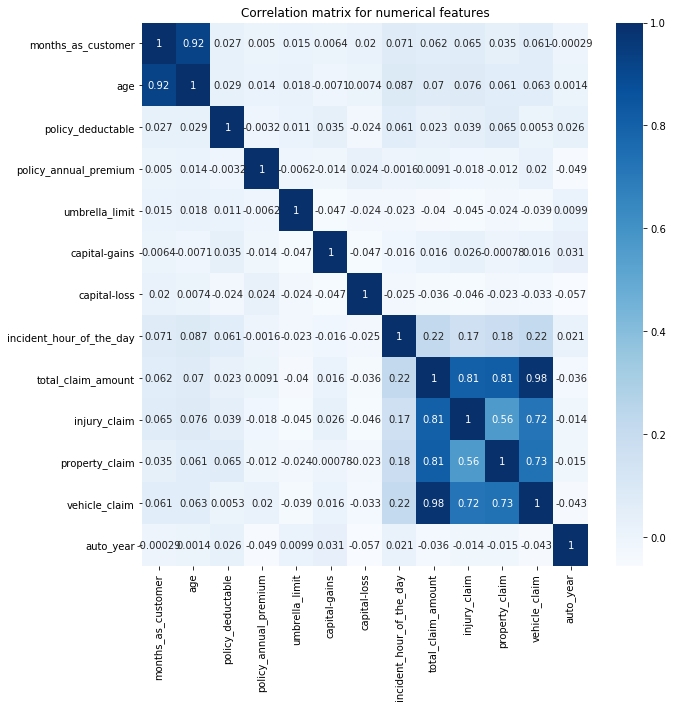

In [14]:
gc.heatmaps(num)

## Make paiplot of Numerical features, with distribution as target variable

<Figure size 1440x1440 with 0 Axes>

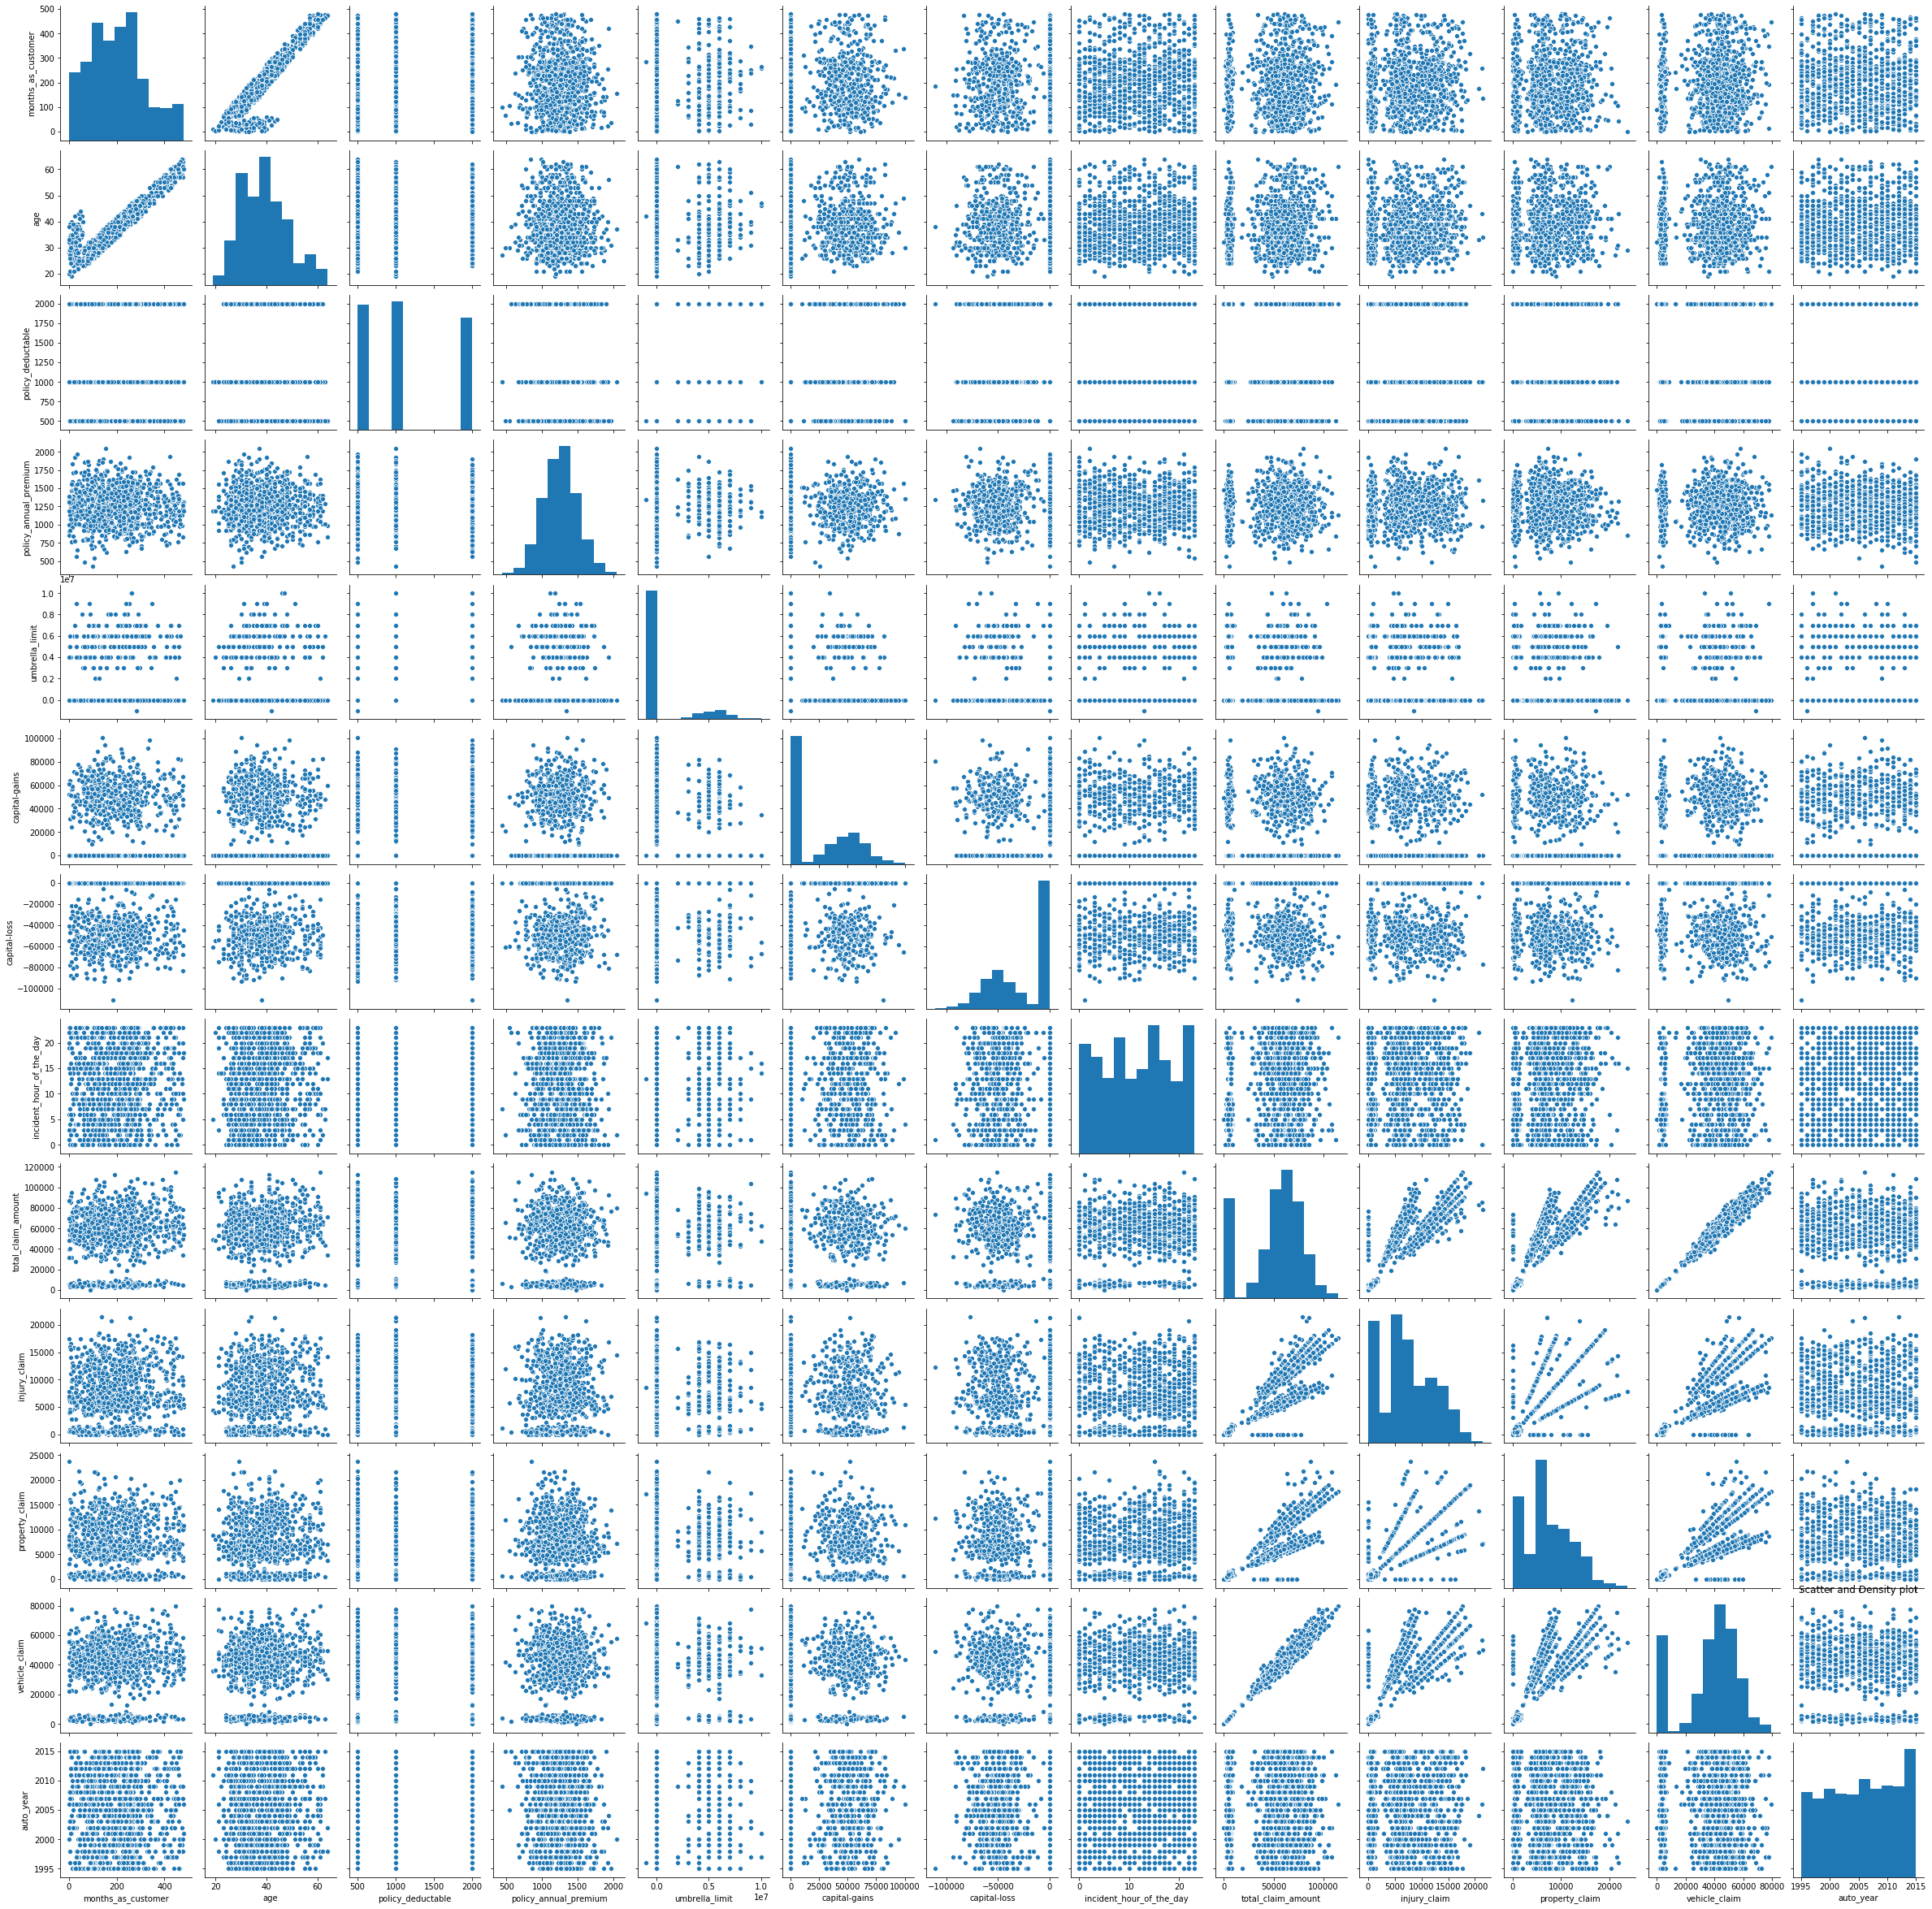

In [15]:
gc.pairplots(num)

## Drop numerical features with correlation > 0.8

In [16]:
corr = num.corr()
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.8:
            if columns[j]:
                columns[j] = False
selected_columns = num.columns[columns]
num = num[selected_columns]

# Prepare Data for modelling

## Label encode categorical features and prepare combined features

In [17]:
#Initiate a labelencoder object
d_label = defaultdict(LabelEncoder)
new_cat = new_cat.apply(lambda x: d_label[x.name].fit_transform(x))

X_new = num.join(new_cat)
le = LabelEncoder()
y = le.fit_transform(y)

## Split data into train and test set with stratification

In [18]:
X_train, X_test, y_train, y_test = tts(X_new, y, test_size = 0.2, random_state = 42, stratify = y)

## Initiate a base rfc model

In [19]:
rfc = RandomForestClassifier(random_state = 42, oob_score = True)

## Fit model on training data

In [20]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=42, verbose=0,
                       warm_start=False)

## Make prediction using X_test

In [21]:
y_pred_rfc = rfc.predict(X_test)

## View classification report

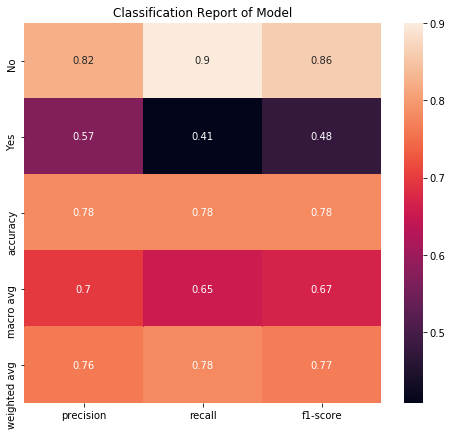

In [22]:
gc.classification_graph(y_test, y_pred_rfc)

## Define params to use in RandomizedSearchCV

In [23]:
params = {'n_estimators' : np.arange(100, 1000, 100), 'max_depth': np.arange(10, 40, 2),
          'min_samples_split': np.arange(0.01, 0.1, 0.01), 'criterion': ['gini', 'entropy'],
          'class_weight': ['balanced', None, 'balanced_subsample']}

## Intialize a RandomizedSearchCV

In [24]:
rfc_cv = RandomizedSearchCV(estimator = rfc, param_distributions= params, cv = 10, random_state = 42)

## Fit RandomizedSearchCV on training data

In [25]:
rfc_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
              

## View Best estimator and save it as rfc

In [26]:
print(rfc_cv.best_estimator_)
rfc = rfc_cv.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=22, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=0.05, min_weight_fraction_leaf=0.0,
                       n_estimators=900, n_jobs=None, oob_score=True,
                       random_state=42, verbose=0, warm_start=False)


## Fit rfc with best params on training data

In [27]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=22, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=0.05, min_weight_fraction_leaf=0.0,
                       n_estimators=900, n_jobs=None, oob_score=True,
                       random_state=42, verbose=0, warm_start=False)

## Make prediction using X_test

In [28]:
y_pred_rfc2 = rfc.predict(X_test)

## View classification report

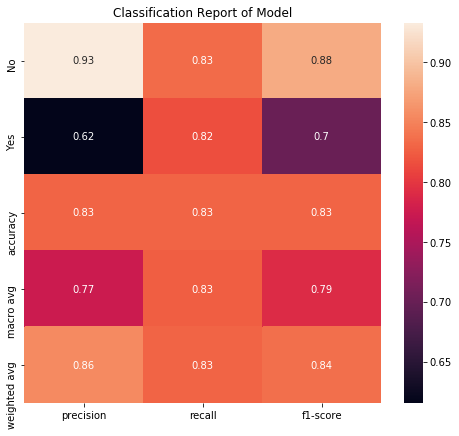

In [29]:
gc.classification_graph(y_test, y_pred_rfc2)

## View important features as per model

In [30]:
#Define function to view important features
def feature_importance(estimator, features):
    important_features = pd.DataFrame(list(rfc.feature_importances_), columns = ['feature importance'])
    features = pd.DataFrame(list(features), columns = ['Features'])
    global best_features
    best_features = features.join(important_features)
    best_features = best_features.sort_values(by = 'feature importance', ascending = False)
    print(best_features)
    
#Apply function on rfc
feature_importance(rfc, X_new)

                       Features  feature importance
18            incident_severity            0.363398
14              insured_hobbies            0.145536
7            total_claim_amount            0.077708
0            months_as_customer            0.039635
2         policy_annual_premium            0.035527
6      incident_hour_of_the_day            0.028499
13           insured_occupation            0.028076
8                     auto_year            0.025418
28                   auto_model            0.024407
20               incident_state            0.023891
4                 capital-gains            0.023698
27                    auto_make            0.021966
5                  capital-loss            0.021359
19        authorities_contacted            0.015065
25                    witnesses            0.014460
21                incident_city            0.014370
3                umbrella_limit            0.013768
16                incident_type            0.013465
12      insu

## View graph of Feature Importance

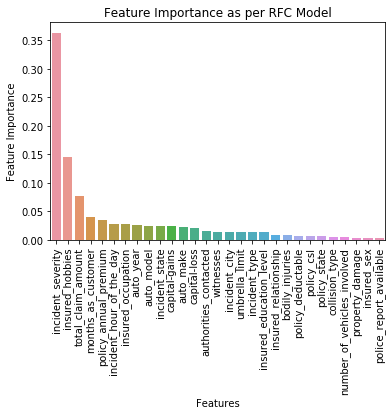

In [31]:
gc.feature_imp_graph('RFC', best_features, 'Features', 'feature importance')

## Drop unimportant features

In [32]:
#Subset best_features on unimportant_features
unimportant_features = best_features[best_features['feature importance'] < 0.01]
list_unimportant_features = unimportant_features['Features'].tolist()
X_train_rfc = X_train.drop(list_unimportant_features, 1)
X_test_rfc = X_test.drop(list_unimportant_features, 1)
X_rfc = X_new.drop(list_unimportant_features, 1)

## Fit model on training data with important features

In [33]:
rfc.fit(X_train_rfc, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=22, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=0.05, min_weight_fraction_leaf=0.0,
                       n_estimators=900, n_jobs=None, oob_score=True,
                       random_state=42, verbose=0, warm_start=False)

## Make prediction using X_test

In [34]:
y_pred_rfc3 = rfc.predict(X_test_rfc)

## View classification report

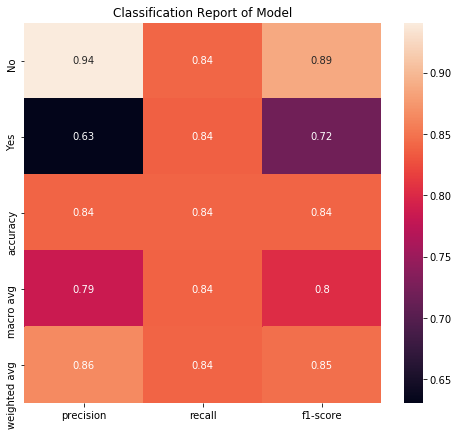

In [35]:
gc.classification_graph(y_test, y_pred_rfc3)

## View ROC AUC Curve of RFC Best model

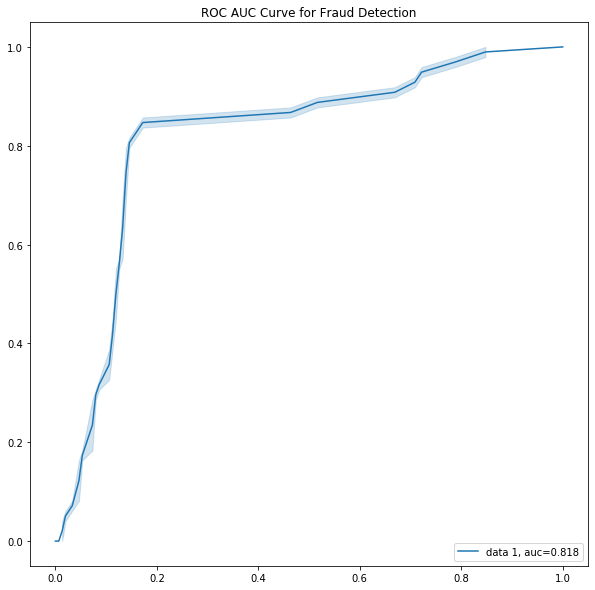

In [36]:
gc.roc_auc_curve(rfc, X_test_rfc, y_test)

## Initiate a base XGBoosting Model

In [37]:
xgbc = XGBClassifier(random_state = 42)

## Fit model on Training Data

In [38]:
xgbc.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

## Make Prediction using X_test

In [39]:
y_pred_xgbc = xgbc.predict(X_test)

## View classification report

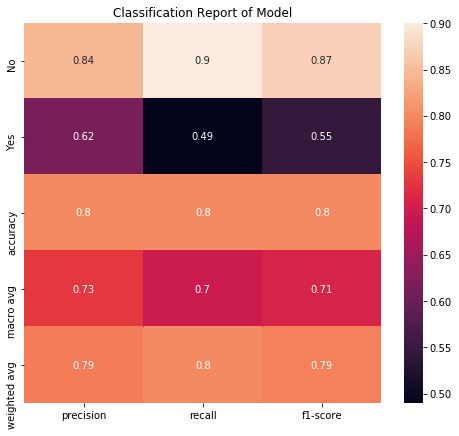

In [40]:
gc.classification_graph(y_test, y_pred_xgbc)

## Define params to use for RandomizedSearchCV

In [41]:
params_xgbc = {'learning_rate': np.arange(0.01, 0.1, 0.01), 'max_depth': np.arange(10, 40, 2),
               'max_delta_step': np.arange(1, 10, 1), 'lambda': np.arange(1, 5, 1), 'alpha': np.arange(1, 5, 1)}

## Initialize a Randomized SearchCV for XGBC

In [42]:
xgbc_cv = RandomizedSearchCV(estimator = xgbc, param_distributions= params_xgbc, cv = 10, random_state = 42)

## Fit gbc_cv on Training Data

In [43]:
xgbc_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster=None,
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           gpu_id=-1, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=0.300000012,
                                           max_delta_step=0, max_depth=6,
                                           min_child_weight=1, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                   param_distributions={'alpha': array([1, 2, 3, 4]),
                                        'lambda': array([1, 2, 3, 4]),
                                       

## View best estimator and save it as gbc

In [44]:
print(xgbc_cv.best_estimator_)
xgbc = xgbc_cv.best_estimator_

XGBClassifier(alpha=2, base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None, lambda=2,
              learning_rate=0.02, max_delta_step=4, max_depth=30,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)


## Fit GBC with best params on training data

In [45]:
xgbc.fit(X_train, y_train)

XGBClassifier(alpha=2, base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None, lambda=2,
              learning_rate=0.02, max_delta_step=4, max_depth=30,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

## Make prediction using X_test

In [46]:
y_pred_xgbc2 = xgbc.predict(X_test)

## View classification report

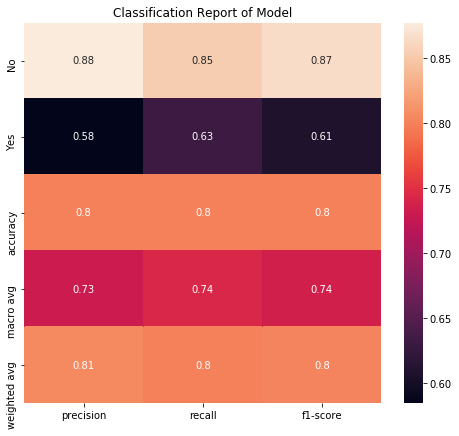

In [47]:
gc.classification_graph(y_test, y_pred_xgbc2)

## Apply feature importance function on gbc

In [48]:
feature_importance(xgbc, X_new)

                       Features  feature importance
12      insured_education_level            0.388272
10                   policy_csl            0.162824
6      incident_hour_of_the_day            0.084363
1             policy_deductable            0.040746
0            months_as_customer            0.040397
9                  policy_state            0.032085
5                  capital-loss            0.026286
18            incident_severity            0.025986
7            total_claim_amount            0.025714
4                 capital-gains            0.023793
3                umbrella_limit            0.023202
14              insured_hobbies            0.022436
17               collision_type            0.020731
2         policy_annual_premium            0.014813
13           insured_occupation            0.014557
16                incident_type            0.014240
8                     auto_year            0.013559
15         insured_relationship            0.013557
11          

## View the feature importances as a graph

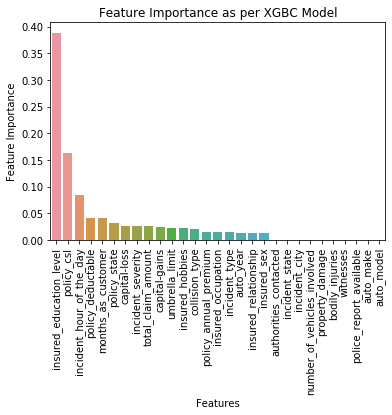

In [49]:
gc.feature_imp_graph('XGBC', best_features, 'Features', 'feature importance')

## Drop unimportant features

In [50]:
#Subset best_features on unimportant_features
best_features['feature importance'] = best_features['feature importance'].replace(np.nan, 0)
unimportant_features = best_features[best_features['feature importance'] < 0.01]
list_unimportant_features = unimportant_features['Features'].tolist()
X_train_xgbc = X_train.drop(list_unimportant_features, 1)
X_test_xgbc = X_test.drop(list_unimportant_features, 1)
X_xgbc = X_new.drop(list_unimportant_features, 1)

## Fit model on data with Important features

In [51]:
xgbc.fit(X_train_xgbc, y_train)

XGBClassifier(alpha=2, base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None, lambda=2,
              learning_rate=0.02, max_delta_step=4, max_depth=30,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

## Make prediction using X_test

In [52]:
y_pred_xgbc3 = xgbc.predict(X_test_xgbc)

## View classification report

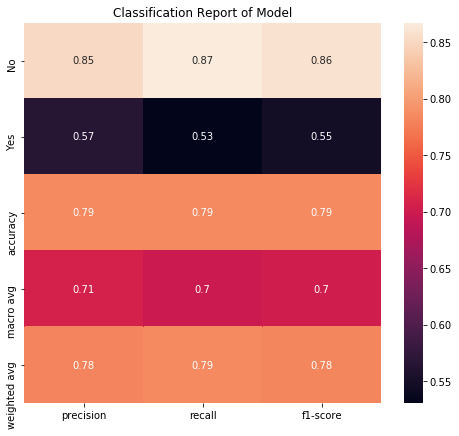

In [53]:
gc.classification_graph(y_test, y_pred_xgbc3)

## View ROC AUC curve of gbc best model

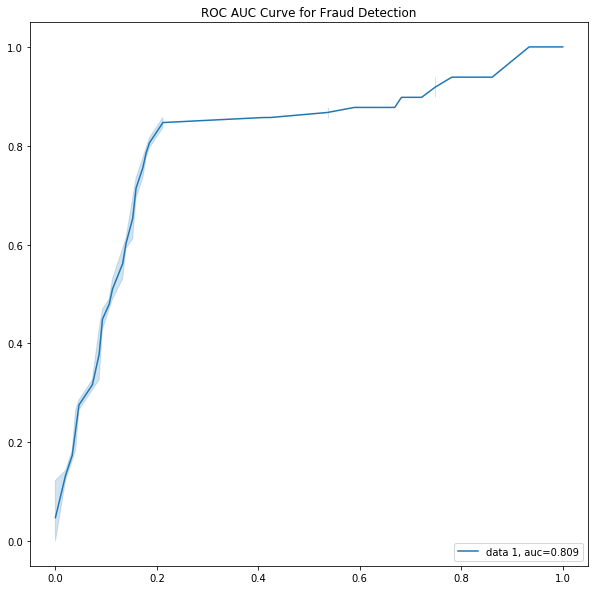

In [54]:
gc.roc_auc_curve(xgbc, X_test_xgbc, y_test)